In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
df = pd.read_csv("C:/Users/DELL/Downloads/archive (3)/predictive_maintenance.csv")  # Replace with your actual file path

# Drop UID and Product ID columns (UID is unnecessary, and Product ID will be encoded)
df = df.drop(['UDI', 'Product ID'], axis=1)

# Encode categorical columns
label_encoder = LabelEncoder()
df['Type'] = label_encoder.fit_transform(df['Type'])
df['Failure Type'] = label_encoder.fit_transform(df['Failure Type'])

# Standardize numerical columns
scaler = StandardScaler()
num_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
df[num_cols] = scaler.fit_transform(df[num_cols])

# Split the data into features and target
X = df.drop('Target', axis=1)
y = df['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

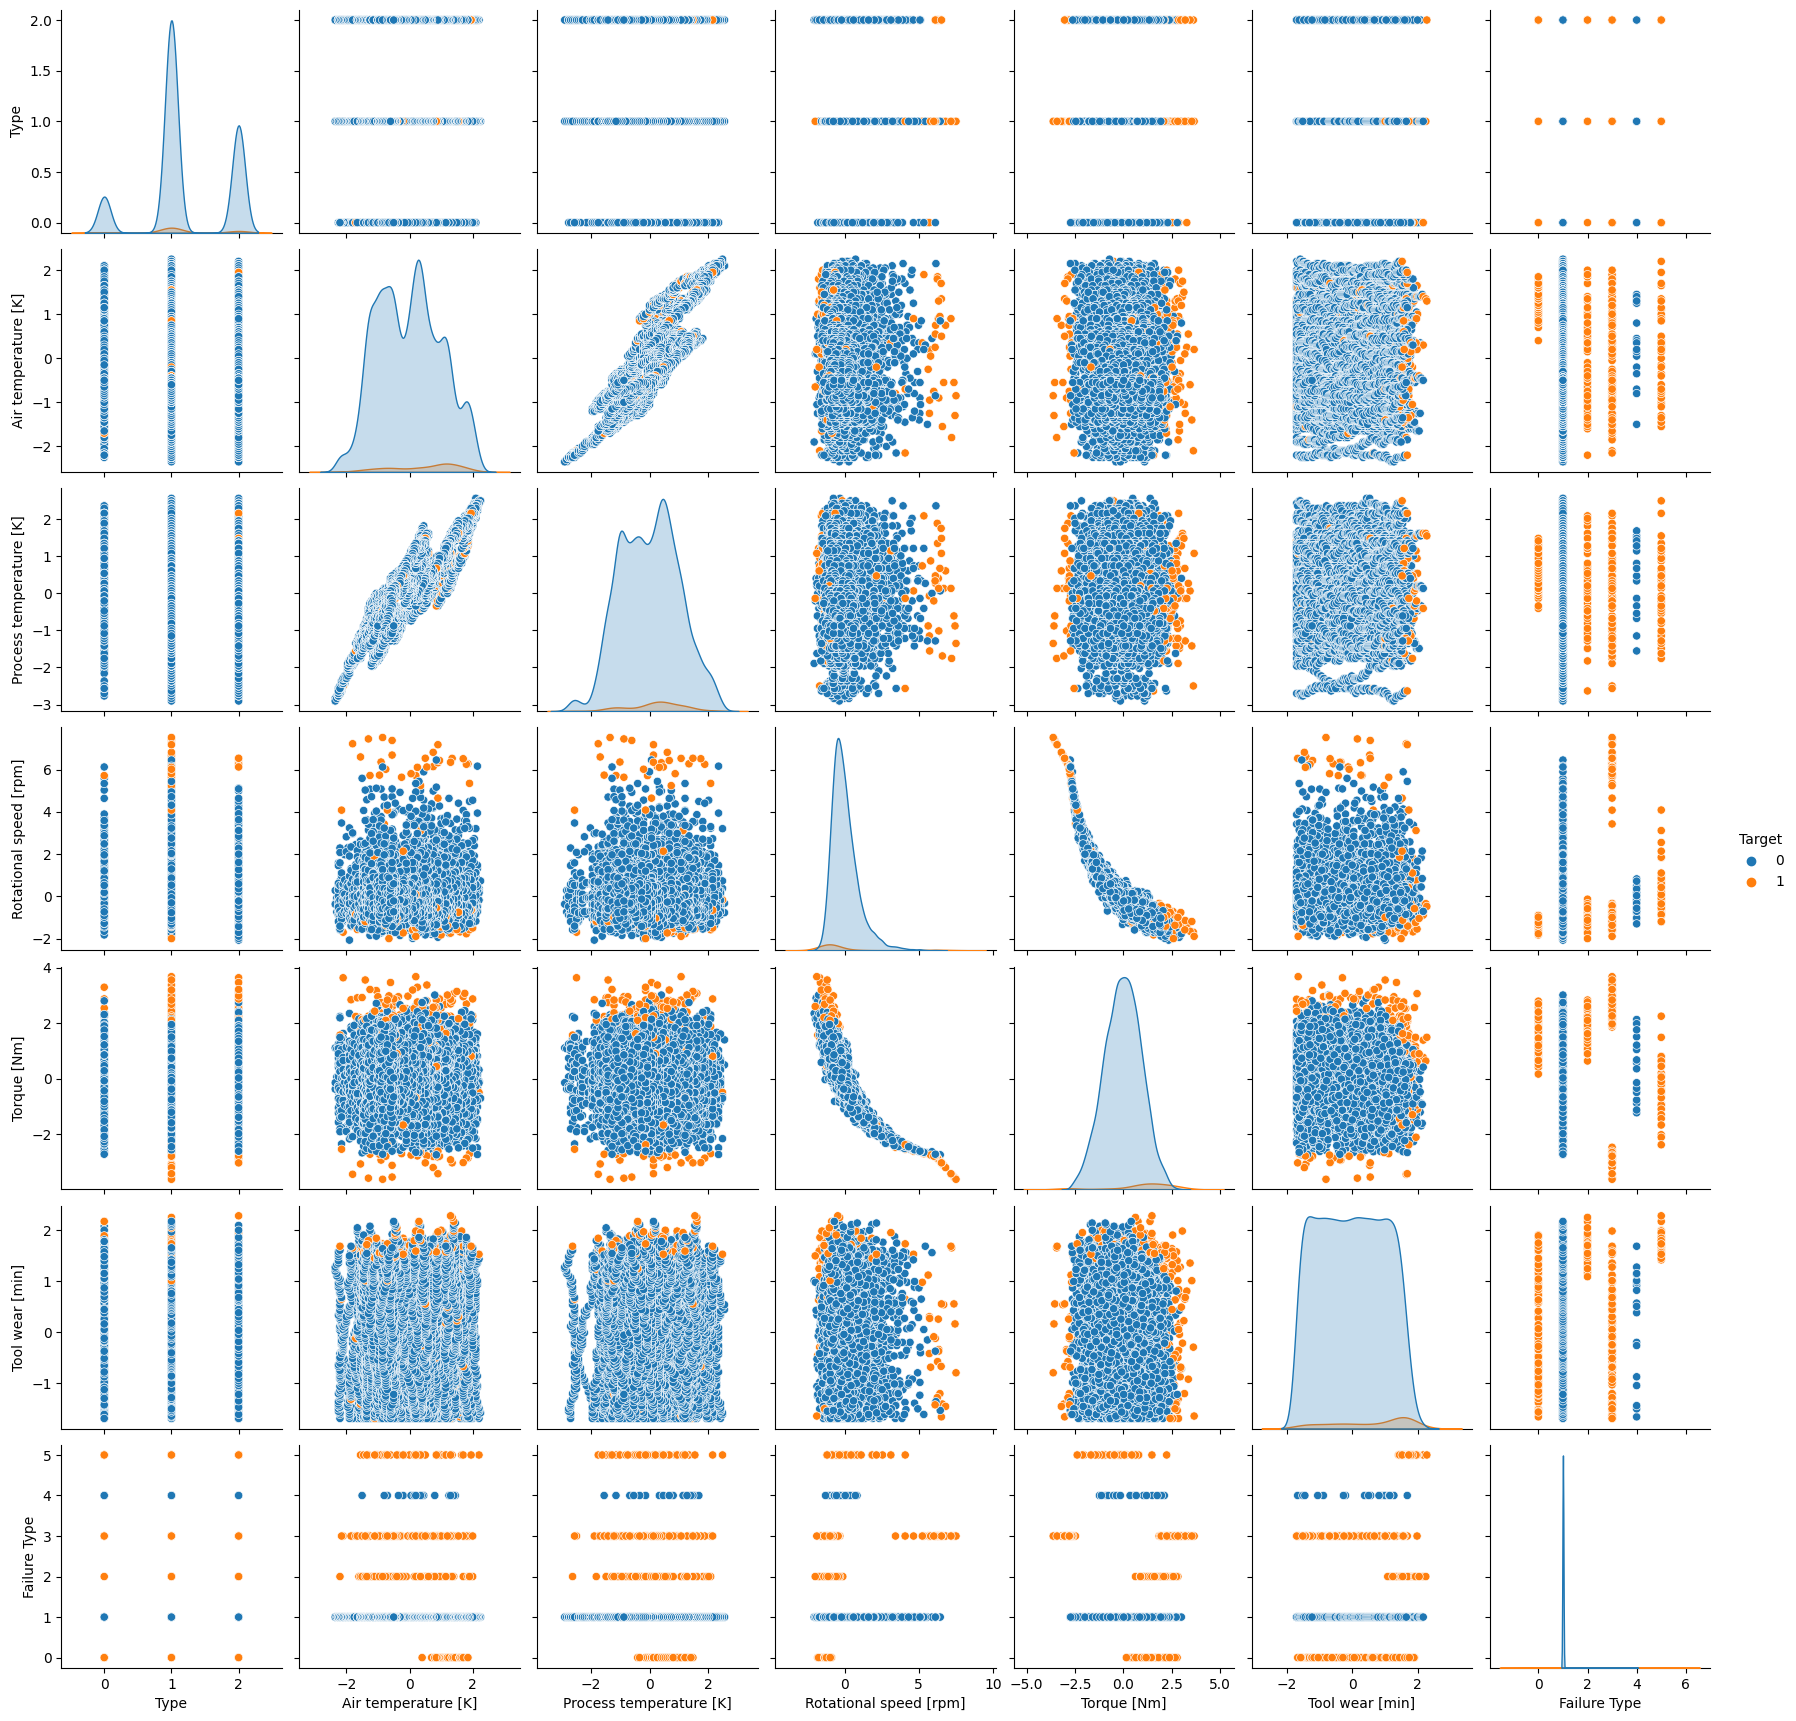

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explore the data visually (you can customize this based on your needs)
sns.pairplot(df, hue='Target')
plt.show()


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Define your neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Initialize the model, criterion, and optimizer
input_size = len(X.columns)
hidden_size = 64
output_size = 2  # binary classification
model = NeuralNetwork(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'lr': [0.001, 0.01, 0.1],
    'module__hidden_size': [32, 64, 128],
    'max_epochs': [10, 20, 30],
}

# Wrap PyTorch model in a scikit-learn estimator
from skorch import NeuralNetClassifier
skorch_model = NeuralNetClassifier(
    NeuralNetwork,
    criterion=nn.CrossEntropyLoss,
    optimizer=optim.Adam,
)



input_size = len(X.columns)
output_size = 2  # binary classification

skorch_model = NeuralNetClassifier(
    NeuralNetwork,
    input_size=input_size,  # Explicitly pass input_size
    output_size=output_size,  # Explicitly pass output_size
    criterion=nn.CrossEntropyLoss,
    optimizer=optim.Adam,
)

grid_search = GridSearchCV(skorch_model, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_tensor, y_train_tensor)
best_params = grid_search.best_params_

In [12]:
# Train the model
for epoch in range(best_params['epochs']):
    for batch in train_loader:
        inputs, labels = batch
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.long())
        loss.backward()
        optimizer.step()

# Evaluate the model
with torch.no_grad():
    model.eval()
    train_preds = model(X_train_tensor).argmax(dim=1)
    test_preds = model(X_test_tensor).argmax(dim=1)

# Visualization of Loss and Accuracy
# (You can use matplotlib to plot the loss and accuracy over epochs)

# Calculate metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

train_accuracy = accuracy_score(y_train_tensor, train_preds)
test_accuracy = accuracy_score(y_test_tensor, test_preds)

print(f'Training Accuracy: {train_accuracy}')
print(f'Testing Accuracy: {test_accuracy}')

# Additional metrics
print(classification_report(y_test_tensor, test_preds))
conf_matrix = confusion_matrix(y_test_tensor, test_preds)
print('Confusion Matrix:')
print(conf_matrix)


NameError: name 'best_params' is not defined